In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from wrangle import wrangle_cars

from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
df = wrangle_cars()
df.head()

body_type column ignored
city is not a float or int
cyl column ignored
dealer column ignored
fuel_type column ignored
accidents column ignored
new column ignored
listed_date is not a float or int
model is not a float or int
seats column ignored
tran column ignored
drive_type is not a float or int
Memory usage of dataframe is 213.09 MB
Memory usage after optimization is: 54.36 MB
Decreased by 74.5%


,back_legroom,body_type,city,city_mpg,daysonmarket,cyl,displ,dealer,front_legroom,tank_size,fuel_type,accidents,hwy_mpg,horsepower,new,length,listed_date,model,seats,mileage,owners,price,seller_rating,tran,drive_type,wheelbase,width,year
0,38.093750,Sedan,Bay Shore,27.0,55.0,I4,1500.0,True,42.00000,15.796875,Gasoline,False,36.0,160.0,False,193.75,2020-07-16,Chevrolet,5.0,42394.0,1.0,14639.0,3.447266,A,FWD,111.3750,73.0000,2018.0
1,27.296875,Coupe,Bronx,18.0,36.0,V6,3500.0,True,45.40625,17.406250,Gasoline,False,24.0,311.0,False,184.75,2020-08-04,Lexus,4.0,62251.0,1.0,32000.0,2.800781,A,AWD,107.5000,81.5000,2018.0
2,38.406250,SUV,Bay Shore,18.0,27.0,V6,3600.0,True,41.00000,19.406250,Gasoline,False,27.0,310.0,False,204.25,2020-08-13,Chevrolet,8.0,36410.0,1.0,23723.0,3.447266,A,FWD,120.8750,78.6250,2018.0
3,36.812500,SUV,Bay Shore,15.0,27.0,V6,3600.0,True,41.31250,22.000000,Gasoline,True,22.0,281.0,False,203.75,2020-08-13,Chevrolet,8.0,36055.0,1.0,22422.0,3.447266,A,AWD,118.8750,78.5000,2017.0
4,38.593750,SUV,Bay Shore,18.0,24.0,V6,3600.0,True,40.31250,24.593750,Gasoline,False,25.0,295.0,False,189.75,2020-08-16,Jeep,5.0,25745.0,1.0,29424.0,3.447266,A,4WD,114.8125,84.8125,2018.0


In [3]:
cont = df.select_dtypes(include=['float32', 'float16'])

In [4]:
for col in cont:
    corr, p = stats.pearsonr(df[col], df['price'])
    print(f'The correlation between {col} and price is: {corr}\n')

The correlation between back_legroom and price is: 0.18508292864276193

The correlation between city_mpg and price is: -0.376528325814915

The correlation between daysonmarket and price is: -0.06232856793043132

The correlation between displ and price is: 0.4491333164373328

The correlation between front_legroom and price is: 0.07192017772177706

The correlation between tank_size and price is: 0.4740495140532392

The correlation between hwy_mpg and price is: -0.44312042894301273

The correlation between horsepower and price is: 0.6410611198017651

The correlation between length and price is: 0.4394680087806117

The correlation between seats and price is: 0.21480698083854227

The correlation between mileage and price is: -0.5237369451808611

The correlation between owners and price is: -0.3244390193175878

The correlation between price and price is: 0.999999999999752

The correlation between seller_rating and price is: 0.04153918669859478

The correlation between wheelbase and price is:

In [5]:
df.shape

(963096, 28)

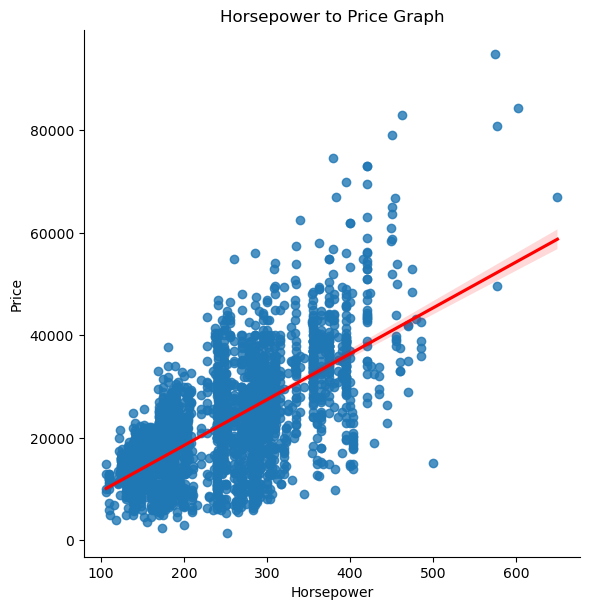

In [37]:
sns.lmplot(x='horsepower', y='price',data=df.sample(3000), line_kws={'color':'red'}, size=6)
plt.title('Horsepower to Price Graph')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

In [7]:
corr, p = stats.pearsonr(df['horsepower'], df['price'])
corr, p

(0.6410611198017651, 0.0)

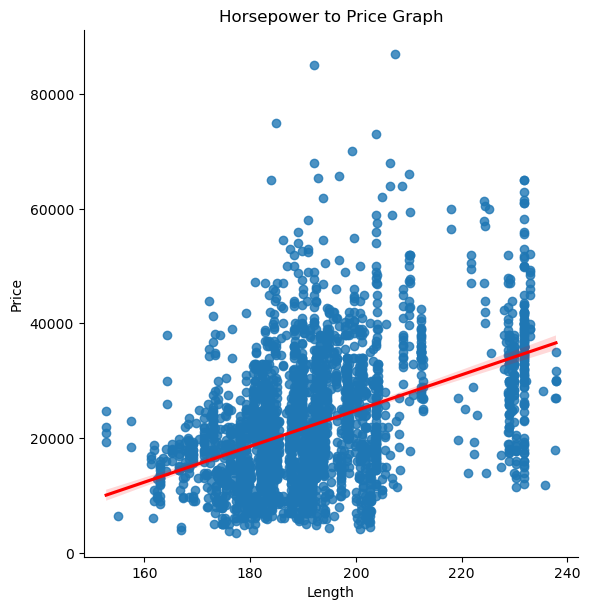

In [36]:
sns.lmplot(x='length', y='price',data=df.sample(3000), line_kws={'color':'red'}, size=6)
plt.title('Length to Price Graph')
plt.xlabel('Length')
plt.ylabel('Price')
plt.show()

In [9]:
corr, p = stats.pearsonr(df['length'], df['price'])
corr, p 

(0.4394680087806117, 0.0)

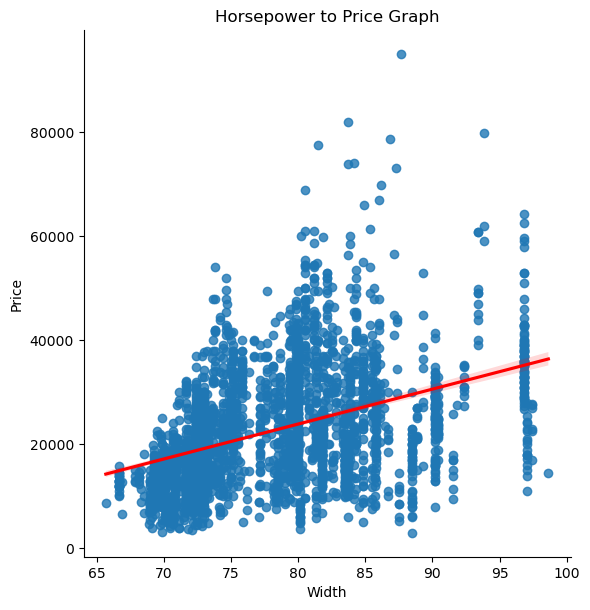

In [35]:
sns.lmplot(x='width', y='price',data=df.sample(3000), line_kws={'color':'red'}, size=6)
plt.title('Width to Price Graph')
plt.xlabel('Width')
plt.ylabel('Price')
plt.show()

In [11]:
corr, p = stats.pearsonr(df['width'], df['price'])
corr, p

(0.4135581518626565, 0.0)

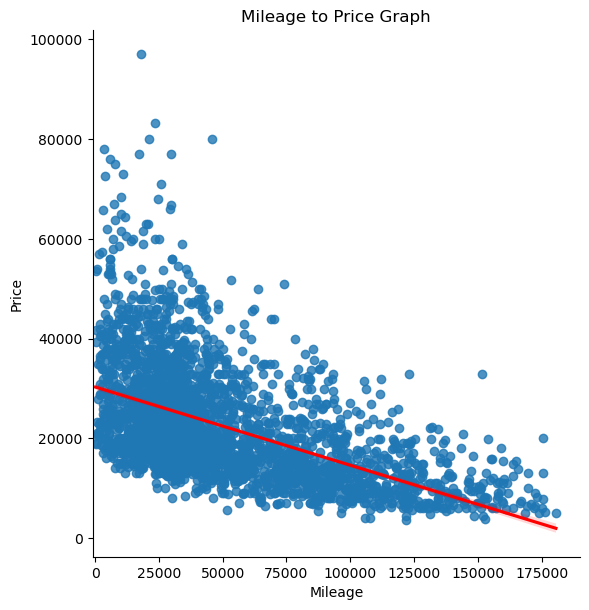

In [34]:
sns.lmplot(x='mileage', y='price',data=df.sample(3000), line_kws={'color':'red'}, size=6,)
plt.title('Mileage to Price Graph')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.xlim((-1000,190000))
plt.show()

In [13]:
corr, p = stats.pearsonr(df['mileage'], df['price'])
corr, p

(-0.5237369451808611, 0.0)

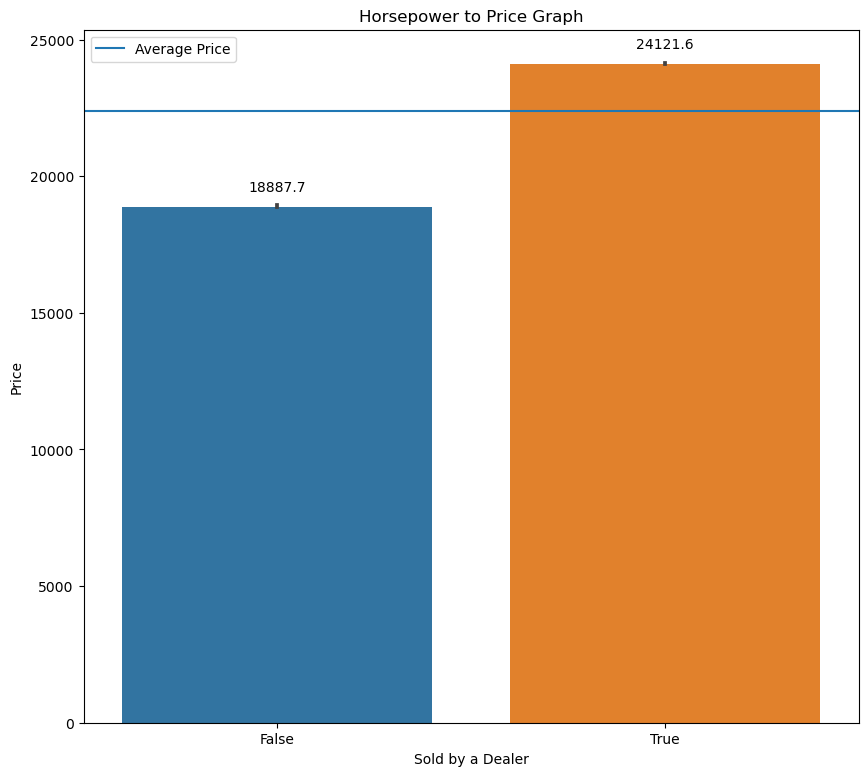

In [14]:
fig,ax = plt.subplots(figsize=(10,9))
bplot = sns.barplot(x='dealer', y='price',data=df)
plt.title('Does whether the car is sold by a dealer affect price?')
plt.xlabel('Sold by a Dealer')
plt.ylabel('Price')
ax.bar_label(bplot.containers[0], padding=9)
plt.axhline(df['price'].mean(), label='Average Price')
plt.legend(loc='upper left')
plt.show()

In [42]:
sold_dealer = df[df['dealer']=='True']['price']

t, p = stats.ttest_1samp(sold_dealer, df['price'].mean())

In [43]:
t, p

(128.3468415740731, 0.0)

In [45]:
alpha = .05

In [46]:
if p/2 > alpha:
    print("We fail to reject null")
elif t < 0:
    print("We fail to reject null")
else:
    print("We reject null")

We reject null
